# Probability Mass Function 

In probability and statistics, a probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value.It is used for a set of discrete random variable. Distribution of the data describes how often each value appears in a dataset. It is necessary to understand the distribution pattern of a given variable.

The sum of probabilites of all events is always equal to 1.

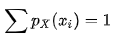


In this section , we will be using the Wine quality dataset and understand where PMF can be implemented and understand its limitations.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
sns.set_style('darkgrid')        

In [ ]:
wine_quality = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine_quality

## Distributions

Summary statistics are concise, but dangerous, because they obscure the data. An alternative is to look at the distribution of the data, which describes
how often each value appears.

* **The most common representation of a distribution is a histogram, which is a graph that shows the frequency or probability of each value.**
* **Frequency means the number of times a value appears in a dataset.**
* **A probability is a frequency expressed as a fraction of the sample size, n. Here the sample size is 1599.**

## Frequency

Below plot shows the frequency of the quality of wine appearing in the dataset.

In [ ]:
sns.countplot(data=wine_quality,x='quality');

Histogram are useful because they make some of the features visible.

* Mode : The most common value in a distribution. 
* Shape : Around the mode, the shape of the distribution is defined. 
* Outliers : Values far from the mode are called outliers. Ex : Wine quality 3 & 8.

## Probability

Below plot shows the probability of the quality of wine appearing in the dataset. 
There are two ways to plot a PMF :
1. Bar graph - if the number of values is small.
2. Line graph - if the number of values is large.

In [ ]:
sns.displot(data=wine_quality,x='quality',stat='probability',discrete=True);

To compute the mean of PMF function : 
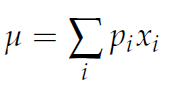

Here,
*     xi is the wine quality
*     pi is the probability of getting xi wine quality.

### PMF Mean

In [ ]:
value,counts=np.unique(wine_quality['quality'].sort_values().to_numpy(),return_counts=True)
probability=counts/np.sum(counts)

PMF_Mean=np.sum(np.multiply(value,probability))  #p1*x1+p2*x2+......
PMF_Mean

### PMF Variance

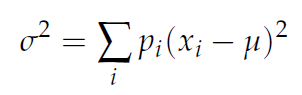

In [ ]:
PMF_Variance= np.sum(probability*(value - PMF_Mean)**2)
PMF_Variance

## Outliers

Outliers are values which are far from the central tendency. It is always a good idea to check for outliers and whether these values should be included or discarded.

# Limits of Probability Mass functions (PMFs)

PMFs work well with small number of data. But as the number of values increases, the probabilities associated with each value gets smaller and smaller and the effect of random noise increases. In this section , I will be plotting PMF for 'sulphates' attribute.

In [ ]:
value,counts=np.unique(wine_quality['sulphates'].sort_values().to_numpy(),return_counts=True)
counts=counts/np.sum(counts)

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
ax.bar(value,counts,width=.01,color='#D9598A',label='Sulphates')
ax.set_xlabel('Sulphates',fontsize=16,fontweight='semibold')
ax.set_ylabel('Probability',fontsize=16,fontweight='semibold')
ax.set_title('Wine quality - Sulphates PMF',fontsize=18,fontweight='semibold')
ax.legend();

These problems can be mitigated by binning the data i.e dividing the data into non-overlapping intervals and counting the number of values in each bin.**Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.**

An alternative to avoid these problems is the **Cumulative distribution function** or **CDF**.

References :
 * Think Stats by Allen B. Downey
 * [Probability Mass function - Wikipedia](https://en.wikipedia.org/wiki/Probability_mass_function#:~:text=In%20probability%20and%20statistics%2C%20a,as%20the%20discrete%20density%20function.&text=The%20value%20of%20the%20random,mass%20is%20called%20the%20mode.)